<a href="https://colab.research.google.com/github/atoothman/DATA-70500/blob/main/Activity_2a_LinearModels1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the Linear Model in Python

We are going to compute the linear relationship between two numeric variables using ordinary least squires (OLS). This is a technique for describing how variation in one variable (X) helps explain variation in another (Y). We'll also visualize the relationship.

This will be the foundation upon which we can build a sociological analysis of data about the social world.

The code in Python to do this is relatively straight-forward. If you've had a statistics course, you've probably seen the statistical tools. But don't worry if you haven't. I'll explain the steps so that you can reproduce the analysis with variables you select.

First, we need to import some standard libraries.

In [ ]:
# Code block 1: Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as scp

Next, we'll read in data and create a DataFrame object. We'll use variables from this data object in our analysis and visualization.

The external file is an Excel spreadsheet. In our last lesson, we saw the code for reading in an Excel file.

The data are global social indicators -- that is, measures of the characteristics of society that allow us to compare nations. The cases in this file are countries. Our explanations, then, should focus on the relationship between characteristics of countries, not of individuals.

In [ ]:
# Code block 2: Read in data
GlobalSocialIndicators = pd.read_excel('http://data.shortell.nyc/files/HumanDevelopment.xlsx', index_col='Country', na_values=[np.nan])
GlobalSocialIndicators.head() # This allows us to inspect the top of the data file

,HDI Rank,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank
Country,,,,,,,
Norway,1,0.944,81.6,17.5,12.6,64992,5
Australia,2,0.935,82.4,20.2,13.0,42261,17
Switzerland,3,0.930,83.0,15.8,12.8,56431,6
Denmark,4,0.923,80.2,18.7,12.7,44025,11
Netherlands,5,0.922,81.6,17.9,11.9,45435,9


In [ ]:
GlobalSocialIndicators[['Human Development Index (HDI)', 'Gross National Income (GNI) per Capita']].describe()

,Human Development Index (HDI),Gross National Income (GNI) per Capita
count,188.000000,188.000000
mean,0.692457,17014.808511
std,0.154701,18793.634361
min,0.348000,581.000000
25%,0.573750,3690.500000
50%,0.724000,10667.000000
75%,0.816500,22800.500000
max,0.944000,123124.000000


In [ ]:
GlobalSocialIndicators.describe()

,HDI Rank,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank
count,188.000000,188.000000,188.000000,188.00000,188.000000,188.000000,188.000000
mean,94.313830,0.692457,71.105319,12.88617,8.110106,17014.808511,0.186170
std,54.431652,0.154701,8.383277,2.86827,3.092782,18793.634361,17.326139
min,1.000000,0.348000,49.000000,4.10000,1.400000,581.000000,-84.000000
25%,47.750000,0.573750,65.475000,11.10000,5.575000,3690.500000,-9.000000
50%,94.000000,0.724000,73.200000,13.10000,8.500000,10667.000000,1.500000
75%,141.250000,0.816500,76.800000,15.02500,10.725000,22800.500000,11.000000
max,188.000000,0.944000,84.000000,20.20000,13.100000,123124.000000,47.000000


In this example, I'm going to try to explain variation in life expectancy. Why do some countries have a higher life expectancy than others? The sociological explanation should focus on the characteristics of countries.

One possible explanation has to do with standard of living. The higher the standard of living in a nation, the longer the life expectancy. A higher standard of living is associated with a variety of social factors that might be causally related to life expectancy, including health and well-being. Wealthier nations tend to have better systems of healthcare and other institutions that contribute to overall well-being, including education, culture industry, and leisure.

So I am going to use 'Life Expectancy at Birth' as the variable I'm trying to explain. I'm going to use 'Gross National Income (GNI) per Capita' as the causal factor. My hypothesis is that countries with higher GNI per capita will have higher life expectancy.

In [ ]:
# Code block 3: The linear model
Y = GlobalSocialIndicators['Life Expectancy at Birth']
X = GlobalSocialIndicators['Gross National Income (GNI) per Capita']
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                               OLS Regression Results                               
Dep. Variable:     Life Expectancy at Birth   R-squared:                       0.391
Model:                                  OLS   Adj. R-squared:                  0.387
Method:                       Least Squares   F-statistic:                     119.3
Date:                      Wed, 25 Sep 2024   Prob (F-statistic):           8.99e-22
Time:                              16:39:17   Log-Likelihood:                -619.41
No. Observations:                       188   AIC:                             1243.
Df Residuals:                           186   BIC:                             1249.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

The way that we interpret the results is as follows.

First, we look to see if the linear model is reliable. That is, are the results in the table likely to indicate a real relationship between the variables or just random error? The test of statistical significance is an F-test, and by convention, if the probability of the test is less than 5%, 0.05, then we accept the table as reliable.

In this case, the F-test (in the bottom part of the table) has a probability of 8.99e-22, which is less than 0.05. (This is scientific notation; the e-22 tells us that there are 22 zeros to the left of the number 8.99, or 0.000000000000000000000899. This number is smaller than 0.05) This table is reliable. We can go on to step 2.

The next step is to interpret the goodness of fit of the model. That is, how much of the variation in life expectancy is explained by variation in GNI per capita? This is measured by a parameter called R-squared. The value is the proportion of explained variation. In this case it is 0.391. This means that 39% of the variation in life expectancy is explained by the model. This is pretty good fit for a bivariate linear model.

The third step is to look at the parameter that describes the relationship between GNI per capita and life expectancy. First we check to see that this parameter is reliable. The t-test has a probability of 0.000, which is less than 0.05, so we can interpret the result. The coefficient is 0.0003. In OLS, the coefficient is expressed in the units of the variable we are trying to explain (Y), in this case, life expectancy in years. So for a one unit change in GNI per capita, would would expect a 0.0003 year increase in life expectancy. This seems like a very small effect.

But a one unit increase in the causal variable (X) is a one dollar difference in GNI per capita. That is not a meaningful difference between nations. So we can get a more meaningful difference if we multiply the unit by 1,000.

We would then multiply the coefficient by the same value. This gives us 0.3. So we can interpret the results as, "for an increase in GNI per capita of $1,000 we would expect an increase in life expectancy by 0.3 years."

You could also use 10,000 instead of 1,000. That would yield: "for an increase in GNI per capita of 10,000 we would expect an increase in life expectancy of 3 years."

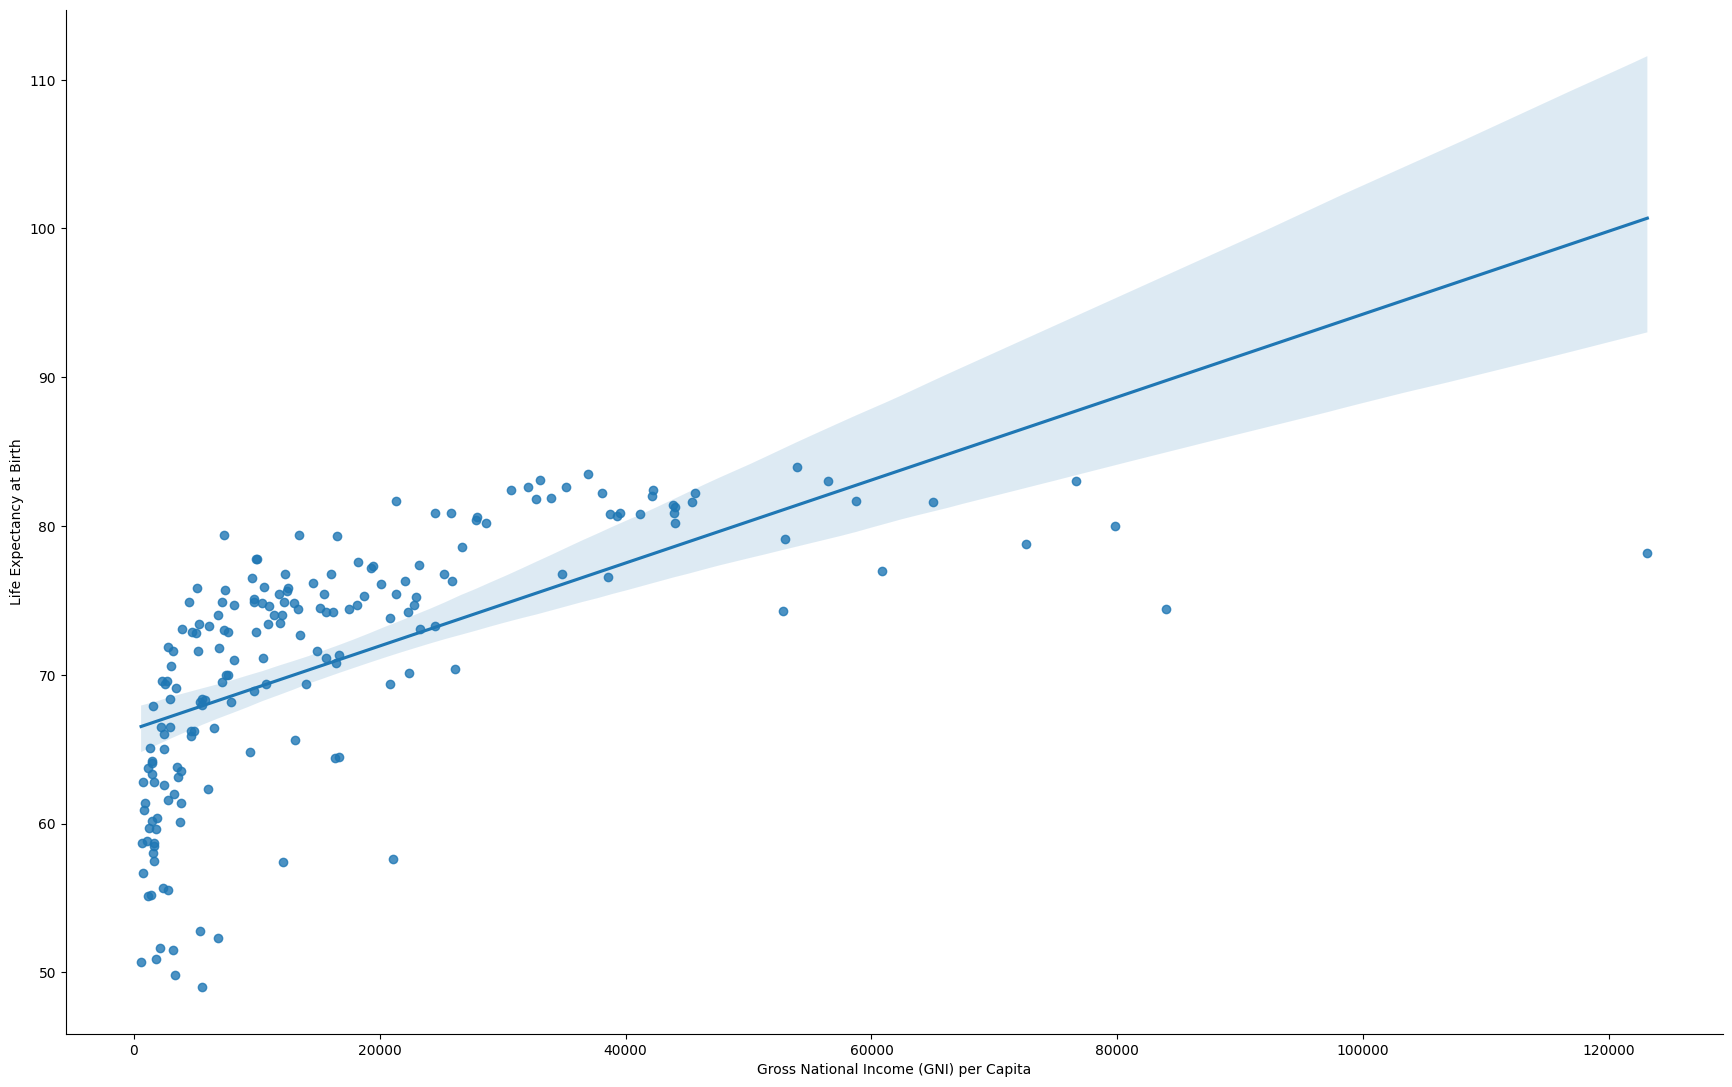

In [ ]:
# Code block 4: Visualizing the linear model
p = sb.lmplot('Gross National Income (GNI) per Capita', 'Life Expectancy at Birth', data=GlobalSocialIndicators)
p.fig.set_figwidth(20)
p.fig.set_figheight(12)
plt.show()

We're using a method in the Seaborn library to plot the linear model. (We'll talk more about the Seaborn library in our next lesson.) This gives us a sense of the relationship for the data as a whole. Wealthier nations (higher on the horizontal axis) have higher life expectancies (higher on the vertical axis) but there is a ceiling effect, it appears. This is probably due to biological factors since even when healthy, humans don't live much longer than 100 years, if that. So among the wealthiest nations, the effect on life expectancy is relatively small. Among poorer nations, the differences are much larger. You can see this because the slope of the scatterplot (not the linear regression line) is much steeper at the left side of the horizontal axis.

In [ ]:
# Code block 5: The linear model
Y = GlobalSocialIndicators['Life Expectancy at Birth']
X = GlobalSocialIndicators[['Gross National Income (GNI) per Capita', 'Expected Years of Education']]
X = sm.add_constant(X)
model2 = sm.OLS(Y, X, missing='drop').fit()
print(model2.summary())

                               OLS Regression Results                               
Dep. Variable:     Life Expectancy at Birth   R-squared:                       0.653
Model:                                  OLS   Adj. R-squared:                  0.649
Method:                       Least Squares   F-statistic:                     173.8
Date:                      Wed, 25 Sep 2024   Prob (F-statistic):           3.34e-43
Time:                              16:39:36   Log-Likelihood:                -566.60
No. Observations:                       188   AIC:                             1139.
Df Residuals:                           185   BIC:                             1149.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [ ]:
# Checking on colinearity
corrtab, corrsig = scp.stats.pearsonr(GlobalSocialIndicators['Gross National Income (GNI) per Capita'], GlobalSocialIndicators['Mean Years of Education'])
corrtab

<ipython-input-18-e948ddf73ec1>:2: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  corrtab, corrsig = scp.stats.pearsonr(GlobalSocialIndicators['Gross National Income (GNI) per Capita'], GlobalSocialIndicators['Mean Years of Education'])


0.5701033493623588

In [ ]:
corrsig

1.3494512118193401e-17

## Activity

1. Read in the Global Social Indicators data and create a DataFrame.
2. Identify a numeric variable that you want to explain. This is your dependent variable (DV), usually named Y. Describe the variable.
3. Identify a numeric variable that you think might partially explain your DV. This is your independent variable (IV), usually named X. Describe this variable.
4. Compute the linear model (using OLS), using the code in block 3 as a guide.
5. Visualize the linear model, using code in block 4 as a model.
6. Interpret the results.



In [ ]:
#1. Read in the Global Social Indicators data and create a DataFrame. Libraries already imported at the top of page
GlobalSocialIndicators = pd.read_excel('http://data.shortell.nyc/files/HumanDevelopment.xlsx', index_col='Country', na_values=[np.nan])
GlobalSocialIndicators.head()


,HDI Rank,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank
Country,,,,,,,
Norway,1,0.944,81.6,17.5,12.6,64992,5
Australia,2,0.935,82.4,20.2,13.0,42261,17
Switzerland,3,0.930,83.0,15.8,12.8,56431,6
Denmark,4,0.923,80.2,18.7,12.7,44025,11
Netherlands,5,0.922,81.6,17.9,11.9,45435,9


In [ ]:
#2. Identify a numeric variable that you want to explain. This is your dependent variable (DV), usually named Y. Describe the variable.
# will expected years of education as the y variable (dependent variable)

GlobalSocialIndicators['Expected Years of Education'].describe()

,Expected Years of Education
count,188.00000
mean,12.88617
std,2.86827
min,4.10000
25%,11.10000
50%,13.10000
75%,15.02500
max,20.20000


In [ ]:
#3. Identify a numeric variable that you think might partially explain your DV. This is your independent variable (IV), usually named X. Describe this variable.
# will use Gross national income per capita as the X variable

GlobalSocialIndicators['Gross National Income (GNI) per Capita'].describe()


,Gross National Income (GNI) per Capita
count,188.000000
mean,17014.808511
std,18793.634361
min,581.000000
25%,3690.500000
50%,10667.000000
75%,22800.500000
max,123124.000000


In [ ]:
#4. Compute the linear model (using OLS), using the code in block 3 as a guide.

# Will set y= Expected years of education and x = Gross national income per capita

Y = GlobalSocialIndicators['Expected Years of Education'] #setting as Y
X = GlobalSocialIndicators['Gross National Income (GNI) per Capita'] #setting as X varibale
X = sm.add_constant(X) # Does this add an intercept as the X variable?
model0 = sm.OLS(Y, X, missing='drop').fit() #sm.OLS is linear regression in statsmodel
print(model0.summary()) #printing summary

                                     OLS Regression Results                                     
Dep. Variable:     Expected Years of Education   R-squared (uncentered):                   0.569
Model:                                     OLS   Adj. R-squared (uncentered):              0.566
Method:                          Least Squares   F-statistic:                              246.5
Date:                         Wed, 25 Sep 2024   Prob (F-statistic):                    5.52e-36
Time:                                 16:22:09   Log-Likelihood:                         -672.80
No. Observations:                          188   AIC:                                      1348.
Df Residuals:                              187   BIC:                                      1351.
Df Model:                                    1                                                  
Covariance Type:                     nonrobust                                                  
                              

Analysis of the above table


*   F test: is less than 5% indicating that the table is reliable
*   Goodness of fit (R-squared): about 57% of variation in expected years of education is explained by the model
*   T-test: has a probablity of 0.00 so we can continue to interpret the result
*   Coefficient: equals 0.0004. One unit change in the GNI per capital expects 0.0004 years of education increase.

1,000 * 0.0004 = 0.4 years increase in education per $1,000

10,0000 * 0.0004 = 4 years increase in education per $10,000 in GNI per capita





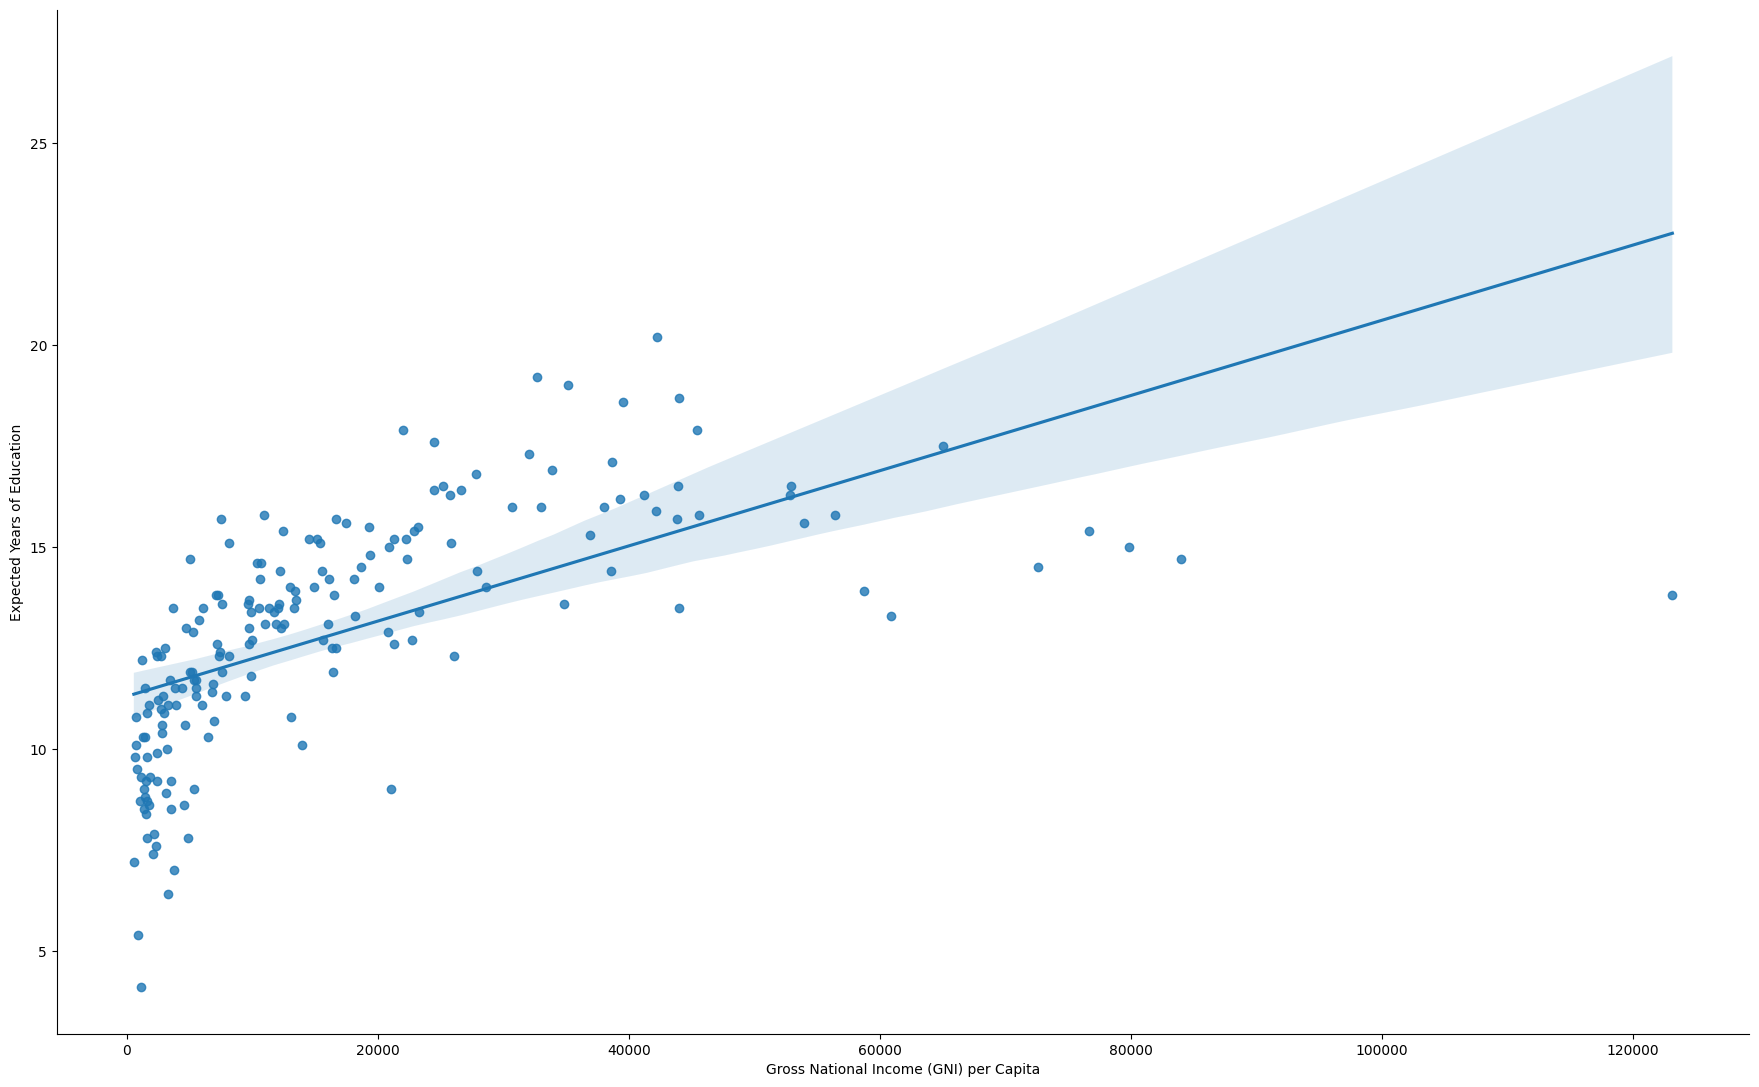

In [ ]:
#5 Visualize the linear model, using code in block 4 as a model.
# Drop missing values for the relevant columns I was recieveing an error message without the code line below
GlobalSocialIndicators = GlobalSocialIndicators.dropna(subset=['Gross National Income (GNI) per Capita', 'Expected Years of Education'])

# Create the plot using keyword arguments
p = sb.lmplot(x='Gross National Income (GNI) per Capita',
               y='Expected Years of Education',
               data=GlobalSocialIndicators)

# Set figure size
p.fig.set_figwidth(20)
p.fig.set_figheight(12)

# Show the plot
plt.show()

6. Interpret the results

Wealthier countries have a higher expected number of years of education. The higher the GNI per capita, typically we see 15+ years in formal education, indicating that people in these countries pursue a college education. There are points of interest in the very high GNI per capita where people are receiving under 15 years of expected formal education. However, it is still higher than the extremely poor countries that are seeing under ~12 years of formal education.


